**Importing Libraries:**

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

**Importing Data:**

In [3]:
data =loadmat('satellite.mat')
for i in data.keys():
  print(i)

__header__
__version__
__globals__
X
y


**attribute and labels of data:**

In [4]:
x = data['X']   # attributes
y = data['y']   # labels
print('input_data_shape: {}  ,   output_data_shape: {}'.format(x.shape,y.shape))

input_data_shape: (6435, 36)  ,   output_data_shape: (6435, 1)


**changing labels to -1 and 1:**

In [5]:
y = np.where((y == 0),-1,1)  # change labels to be usable in machine learning methods

**standardize data:**

In [6]:
x = (x - np.mean(x , axis=0)) / (np.std(x , axis=0))  # standardize data

**plot attr label:**

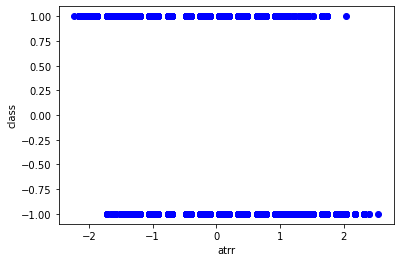

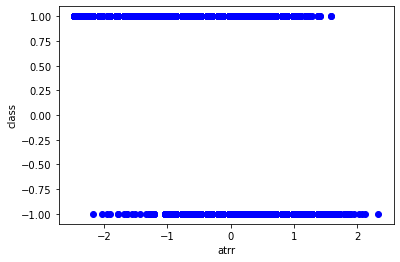

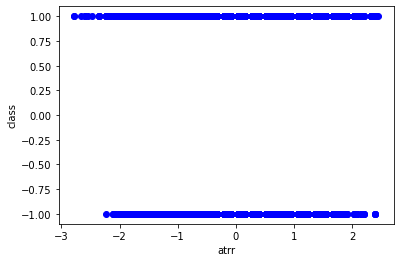

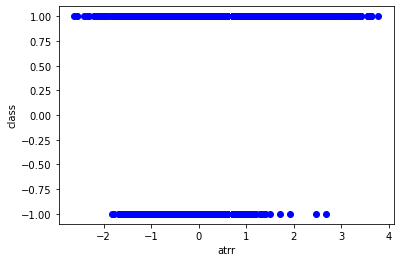

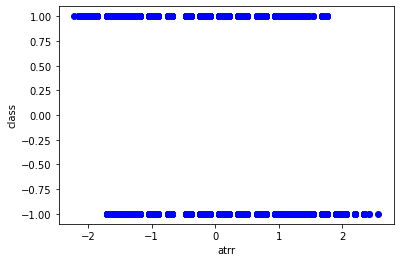

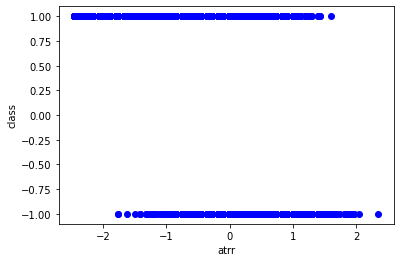

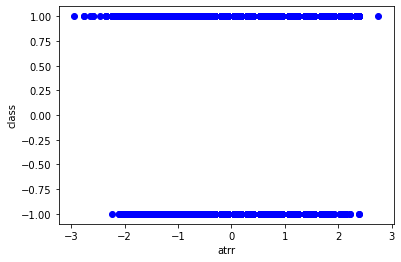

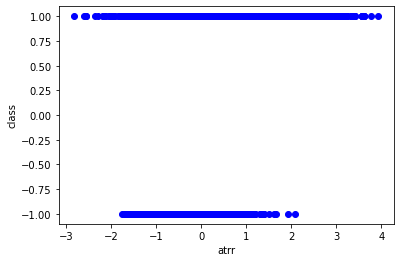

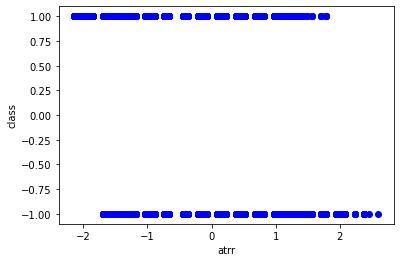

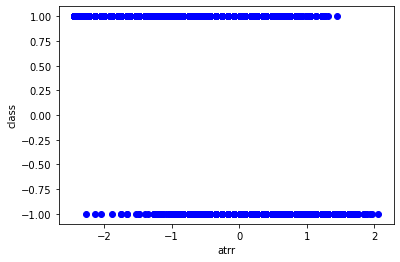

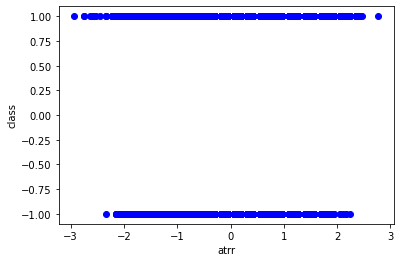

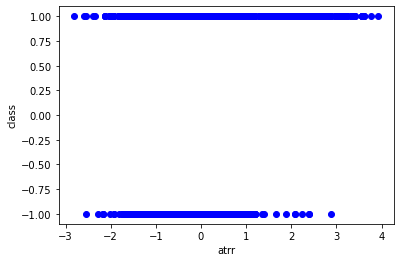

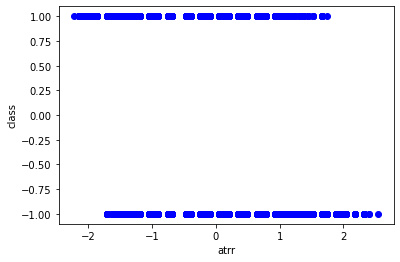

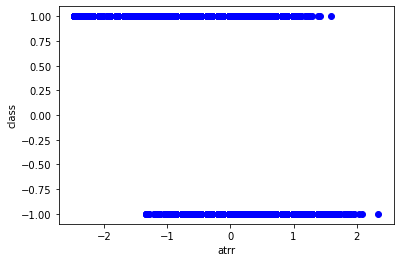

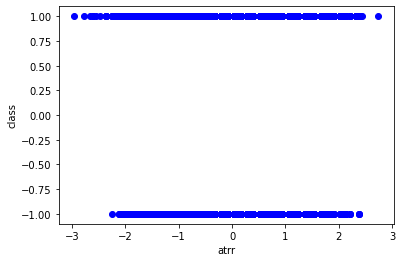

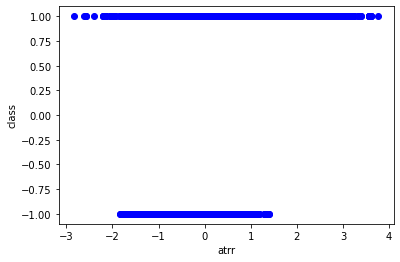

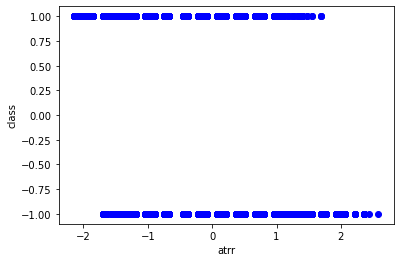

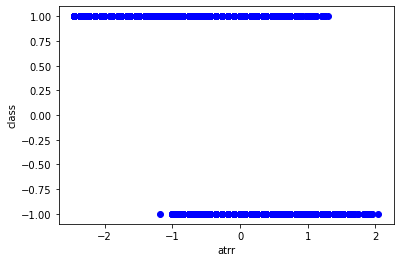

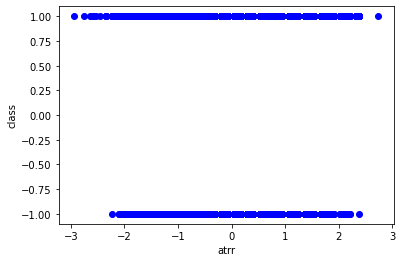

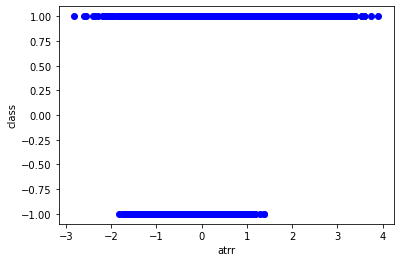

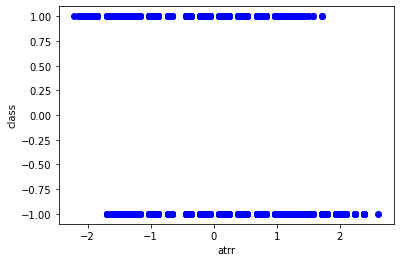

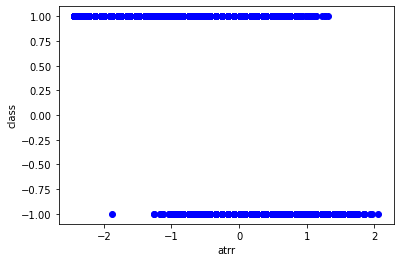

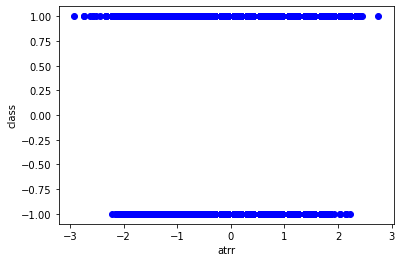

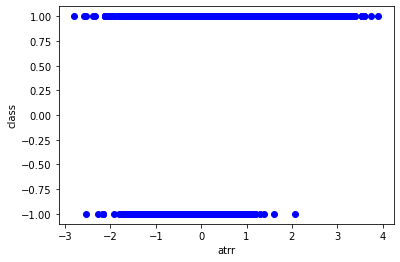

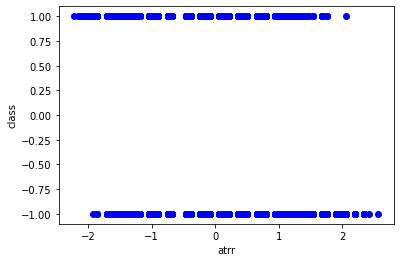

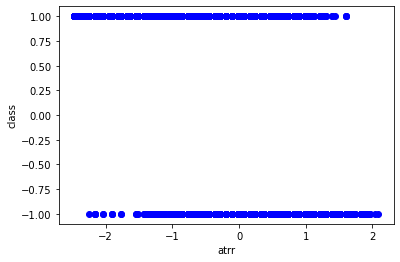

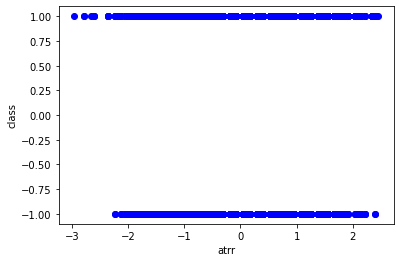

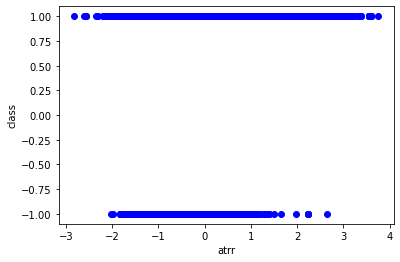

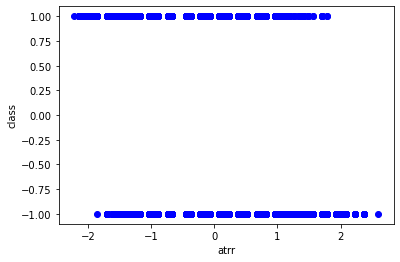

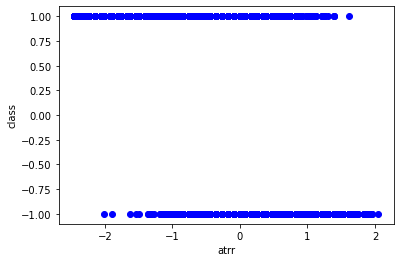

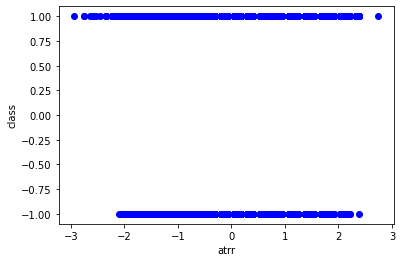

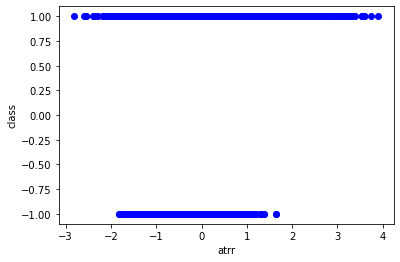

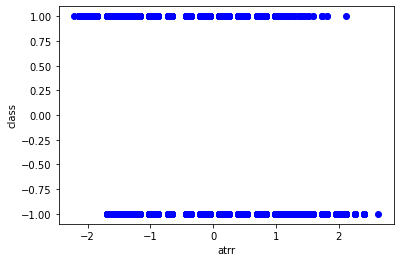

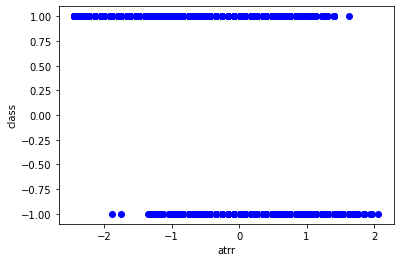

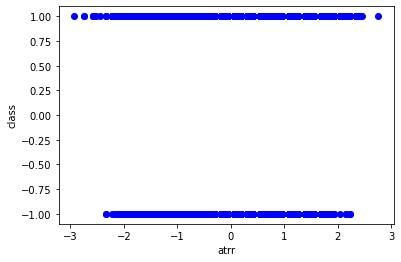

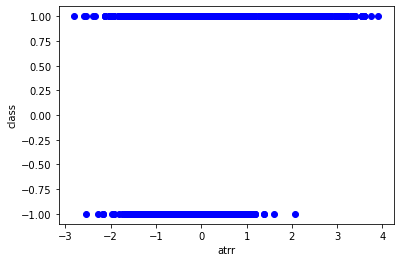

In [ ]:
# plot each one of attributes by labels
for i in range(len(x[0])):
  plt.figure(i)
  plt.plot(x[:,i],y,'bo')
  plt.xlabel('atrr')
  plt.ylabel('class')

**split data to train and validation and test:**

In [7]:
# split data to 60% for train and 20% for validation and 20% for test
x_train_validation, x_test, y_train_validation, y_test = train_test_split(x, y, test_size=0.2, random_state=0 ,shuffle=True)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.25, random_state=0 ,shuffle=True)

**Logistic Classifier:**

Tuning hyperparameter C:

for C=0.1 :    validation_acc=0.8795648795648796
for C=0.13877551020408163 :    validation_acc=0.878010878010878
for C=0.17755102040816328 :    validation_acc=0.8787878787878788
for C=0.2163265306122449 :    validation_acc=0.878010878010878
for C=0.25510204081632654 :    validation_acc=0.8787878787878788
for C=0.29387755102040813 :    validation_acc=0.878010878010878
for C=0.3326530612244898 :    validation_acc=0.8764568764568764
for C=0.37142857142857144 :    validation_acc=0.8764568764568764
for C=0.4102040816326531 :    validation_acc=0.8764568764568764
for C=0.44897959183673475 :    validation_acc=0.8772338772338772
for C=0.4877551020408163 :    validation_acc=0.8772338772338772
for C=0.5265306122448979 :    validation_acc=0.8772338772338772
for C=0.5653061224489796 :    validation_acc=0.8772338772338772
for C=0.6040816326530613 :    validation_acc=0.8764568764568764
for C=0.6428571428571428 :    validation_acc=0.8764568764568764
for C=0.6816326530612244 :    validation_acc=0.87645

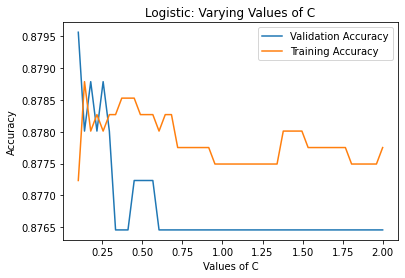

In [ ]:
# Tuning hyperparameter C
best_validation_acc = 0
best_C = 0
C_values = np.linspace(0.1,2,50)    # searching in this interval for best C
train_accuracy = np.empty(len(C_values))
validation_accuracy = np.empty(len(C_values))
for k,i in enumerate(C_values):
    Logistic_classifier = LogisticRegression(C=i)
    Logistic_classifier.fit(x_train,y_train)
    val_acc = Logistic_classifier.score(x_validation,y_validation)
    print('for C={} :    validation_acc={}'.format(i,val_acc))
    if val_acc > best_validation_acc:
        best_validation_acc = val_acc
        best_C = i
    train_accuracy[k] = Logistic_classifier.score(x_train, y_train)
    validation_accuracy[k] = Logistic_classifier.score(x_validation, y_validation)
print('best_validation_acc={}  and  best_C={}'.format(best_validation_acc,best_C))
plt.title('Logistic: Varying Values of C')
plt.plot(C_values, validation_accuracy, label = 'Validation Accuracy')
plt.plot(C_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Values of C')
plt.ylabel('Accuracy')
plt.show()

**Fit Logisctic Classifier on train+validation and score on test:**

In [ ]:
# impliment Logisctic Classifier by using of best_C
Logistic_classifier = LogisticRegression(C=best_C)
Logistic_classifier.fit(x_train_validation,y_train_validation)
train_acc_Logistic_Classifier = Logistic_classifier.score(x_train_validation,y_train_validation) * 100
test_acc_Logistic_Classifier = Logistic_classifier.score(x_test,y_test) * 100

**Results Logestic Classifier:**

In [ ]:
y_predicted_test_Logistic_Classifier = Logistic_classifier.predict(x_test)
print('y_predicted_test_Logistic_Classifier:   {}'.format(y_predicted_test_Logistic_Classifier))

y_predicted_test_Logistic_Classifier:   [-1 -1 -1 ...  1 -1  1]


In [ ]:
print('train_acc_Logistic_Classifier = {} %'.format(train_acc_Logistic_Classifier))
print('test_acc_Logistic_Classifier = {} %'.format(test_acc_Logistic_Classifier))

train_acc_Logistic_Classifier = 87.91763791763792 %
test_acc_Logistic_Classifier = 86.7132867132867 %


**SVC Classifier:**

Tuning hyperparameter C and kernel and gamma:

In [9]:
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['rbf'],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=3)
grid.fit(x_train_validation,y_train_validation)
print("best param:\n",grid.best_params_)
print("best estimator:\n",grid.best_estimator_)
#print("Accuracy:{}%".format(pred.score(X_val,Y_val)*100))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.688, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.688, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.689, total=   1.5s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.689, total=   1.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.689, total=   1.6s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.788, total=   1.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.785, total=   1.2s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.782, total=   1.2s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.788, total=   1.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.1min finished


best param:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best estimator:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [10]:
best_C_SVC = grid.best_params_['C']
best_kernel_SVC = grid.best_params_['kernel']
best_gamma_SVC = grid.best_params_['gamma']
print('best_C_SVC = {}   ,   best_kernel_SVC = {}   ,  best_gamma_SVC = {}'.format(best_C_SVC,best_kernel_SVC,best_gamma_SVC))

best_C_SVC = 10   ,   best_kernel_SVC = rbf   ,  best_gamma_SVC = 0.1


**fit SVC Classifier on train+validation and score on test:**

In [ ]:
# impliment SVC Classifier by using of best_C_SVC_3 and kernel_2 and gamma_1
SVC_Classifier = SVC(C=best_C_SVC, kernel=best_kernel_SVC, gamma=best_gamma_SVC)
SVC_Classifier.fit(x_train_validation,y_train_validation)
train_acc_SVC_Classifier = SVC_Classifier.score(x_train_validation,y_train_validation) * 100
test_acc_SVC_Classifier = SVC_Classifier.score(x_test,y_test) * 100

**Results SVC Classifier:**

In [ ]:
y_predicted_test_SVC_Classifier = SVC_Classifier.predict(x_test)
print('y_predicted_test_SVC_Classifier:   {}'.format(y_predicted_test_SVC_Classifier))

y_predicted_test_SVC_Classifier:   [-1 -1 -1 ...  1 -1  1]


In [ ]:
print('train_acc_SVC_Classifier = {} %'.format(train_acc_SVC_Classifier))
print('test_acc_SVC_Classifier = {} %'.format(test_acc_SVC_Classifier))

train_acc_SVC_Classifier = 97.24164724164724 %
test_acc_SVC_Classifier = 94.32789432789433 %


**Bagging SVC Classifier:**

Tuning hyperparameters :

In [17]:
Bagging_SVC=BaggingClassifier(base_estimator=SVC(C=best_C_SVC, kernel=best_kernel_SVC, gamma=best_gamma_SVC),n_estimators=63,max_samples=1.00)
Bagging_SVC.fit(x_train,y_train)
Bagging_SVC.score(x_validation,y_validation) * 100

93.62859362859362

**Fit Bagging SVC Classifier  on train+validation and score on test:**

In [ ]:
# BaggingClassifier by SVC and best hyperparameters of SVC model
Bagging_SVC_Classifier=BaggingClassifier(base_estimator=SVC(C=best_C_SVC, kernel=best_kernel_SVC, gamma=best_gamma_SVC),n_estimators=63,max_samples=1.00)
Bagging_SVC_Classifier.fit(x_train_validation,y_train_validation)
train_acc_Bagging_SVC_Classifier=Bagging_SVC_Classifier.score(x_train_validation,y_train_validation) * 100
test_acc_Bagging_SVC_Classifier=Bagging_SVC_Classifier.score(x_test,y_test) * 100

**Results Bagging SVC Classifier:**

In [ ]:
y_predicted_test_Bagging_SVC_Classifier = Bagging_SVC_Classifier.predict(x_test)
print('y_predicted_test_Bagging_SVC_Classifier:   {}'.format(y_predicted_test_Bagging_SVC_Classifier))

y_predicted_test_Bagging_SVC_Classifier:   [-1 -1 -1 ...  1 -1  1]


In [ ]:
print('train_acc_Bagging_SVC_Classifier = {} %'.format(train_acc_Bagging_SVC_Classifier))
print('test_acc_Bagging_SVC_Classifier = {} %'.format(test_acc_Bagging_SVC_Classifier))

train_acc_Bagging_SVC_Classifier = 97.3970473970474 %
test_acc_Bagging_SVC_Classifier = 94.4055944055944 %


**ANN Classifier:**

**changing labels -1 to 0 in order to labels become 0 and 1 and useful for ANN Classifier:**

In [ ]:
y_train_ann = np.where((y_train == -1),0,1)
y_validation_ann = np.where((y_validation == -1),0,1)
y_test_ann = np.where((y_test == -1),0,1)
y_train_validation_ann=np.where((y_train_validation == -1),0,1)

Tuning hyperparameters:

**Build ANN Model:**

Tuning hyperparameters :

In [ ]:
# Initializing the ANN
ANN = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ANN.add(tf.keras.layers.Dense(units=36, activation='relu'))

# Adding the second hidden layer
ANN.add(tf.keras.layers.Dense(units=36, activation='relu'))

# Adding the Dropout layer to overcome overfitting
ANN.add(tf.keras.layers.Dropout(0.5))

# Adding the output layer
ANN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Compile ANN:**

In [ ]:
ANN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = ANN.fit(x_train, y_train_ann, batch_size = 32, epochs = 500,validation_data=(x_validation,y_validation_ann))

Epoch 1/500
121/121 [==============================] - 2s 6ms/step - loss: 0.5577 - accuracy: 0.7094 - val_loss: 0.3198 - val_accuracy: 0.8741
Epoch 2/500
121/121 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8636 - val_loss: 0.2633 - val_accuracy: 0.8765
Epoch 3/500
121/121 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8779 - val_loss: 0.2461 - val_accuracy: 0.8819
Epoch 4/500
121/121 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.8870 - val_loss: 0.2394 - val_accuracy: 0.8850
Epoch 5/500
121/121 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8899 - val_loss: 0.2288 - val_accuracy: 0.8936
Epoch 6/500
121/121 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8858 - val_loss: 0.2250 - val_accuracy: 0.8967
Epoch 7/500
121/121 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.8998 - val_loss: 0.2216 - val_accuracy: 0.9068

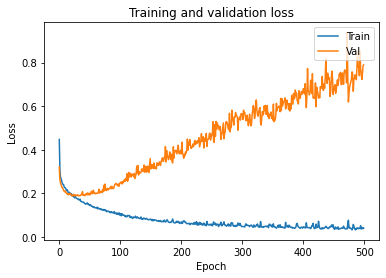

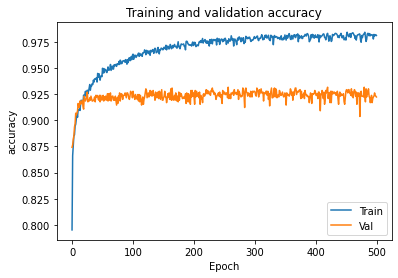

In [ ]:
# Plotting Results
# accuracy and loss by epochs
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()



**Fit ANN to train+valid set**


**Build ANN classifier**

In [ ]:
# Initializing the ANN
ANN_Classifier = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ANN_Classifier.add(tf.keras.layers.Dense(units=36, activation='relu'))

# Adding the second hidden layer
ANN_Classifier.add(tf.keras.layers.Dense(units=36, activation='relu'))

# Adding the Dropout layer to overcome overfitting
ANN_Classifier.add(tf.keras.layers.Dropout(0.5))

# Adding the output layer
ANN_Classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Compile ANN Classifier:**

In [ ]:
ANN_Classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Train ANN Classifier:**

In [ ]:
# by tuning hyperparameters, epoch = 200 is good choice
ANN_Classifier.fit(x_train_validation, y_train_validation_ann, batch_size = 32, epochs = 200)

Epoch 1/200
161/161 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7114
Epoch 2/200
161/161 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8628
Epoch 3/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8847
Epoch 4/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8794
Epoch 5/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.8900
Epoch 6/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.8988
Epoch 7/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9018
Epoch 8/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9021
Epoch 9/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9059
Epoch 10/200
161/161 [==============================] - 0s 1ms/step - loss: 0.2180 - accura

In [ ]:
ANN_Classifier.evaluate(x_test, y_test_ann)

41/41 [==============================] - 0s 1ms/step - loss: 0.3204 - accuracy: 0.9316


[0.3203841745853424, 0.9316239356994629]

In [ ]:
Result_train = ANN_Classifier.evaluate(x_train_validation,y_train_validation_ann)
Result_test = ANN_Classifier.evaluate(x_test,y_test_ann)
train_acc_ANN_Classifier = Result_train[1] * 100
test_acc_ANN_Classifier = Result_test[1] * 100
print('Train Accuracy:')
print(Result_train[1])
print('Test Accuracy:')
print(Result_test[1])

41/41 [==============================] - 0s 894us/step - loss: 0.3204 - accuracy: 0.9316
Train Accuracy:
0.9815462231636047
Test Accuracy:
0.9316239356994629


**Results ANN Classifier:**

In [ ]:
y_predicted_test_ANN_Classifier1 = ANN_Classifier.predict(x_test)
y_predicted_test_ANN_Classifier1 = np.where((y_predicted_test_ANN_Classifier1 > 0.5),1,0)
list_y_predicted_test_ANN_Classifier = []
for i in y_predicted_test_ANN_Classifier1[:,0:1]:
    if i[0] == 1 :
        list_y_predicted_test_ANN_Classifier.append(1)
    else:
        list_y_predicted_test_ANN_Classifier.append(-1)
y_predicted_test_ANN_Classifier = np.array(list_y_predicted_test_ANN_Classifier)
print('y_predicted_test_ANN_Classifier:   {}'.format(y_predicted_test_ANN_Classifier))

y_predicted_test_ANN_Classifier:   [-1 -1 -1 ...  1 -1  1]


In [ ]:
print('train_acc_ANN_Classifier = {} %'.format(train_acc_ANN_Classifier))
print('test_acc_ANN_Classifier = {} %'.format(test_acc_ANN_Classifier))

train_acc_ANN_Classifier = 98.15462231636047 %
test_acc_ANN_Classifier = 93.16239356994629 %


**Comparing Models:**

In [ ]:
y_test = y_test.reshape(-1,)
y_predicted_test_Logistic_Classifier = y_predicted_test_Logistic_Classifier.reshape(-1,)
y_predicted_test_SVC_Classifier = y_predicted_test_SVC_Classifier.reshape(-1,)
y_predicted_test_Bagging_SVC_Classifier = y_predicted_test_Bagging_SVC_Classifier.reshape(-1,)
y_predicted_test_ANN_Classifier = y_predicted_test_ANN_Classifier.reshape(-1,)
df_compare_test = pd.DataFrame({'Actual_y_test': y_test , 'y_predicted_test_Logistic_Classifier': y_predicted_test_Logistic_Classifier, 'y_predicted_test_SVC_Classifier': y_predicted_test_SVC_Classifier, 'y_predicted_test_Bagging_SVC_Classifier': y_predicted_test_Bagging_SVC_Classifier,'y_predicted_test_ANN_Classifier': y_predicted_test_ANN_Classifier})
df_compare_test

,Actual_y_test,y_predicted_test_Logistic_Classifier,y_predicted_test_SVC_Classifier,y_predicted_test_Bagging_SVC_Classifier,y_predicted_test_ANN_Classifier
0,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1
3,1,1,1,1,1
4,1,-1,1,1,1
...,...,...,...,...,...
1282,-1,-1,-1,-1,-1
1283,-1,-1,-1,-1,-1
1284,1,1,1,1,1
1285,-1,-1,-1,-1,-1


In [ ]:
df_compare_accuracy_train = pd.DataFrame({'train_acc_Logistic_Classifier': train_acc_Logistic_Classifier, 'train_acc_SVC_Classifier': train_acc_SVC_Classifier, 'train_acc_Bagging_SVC_Classifier': train_acc_Bagging_SVC_Classifier,'train_acc_ANN_Classifier': train_acc_ANN_Classifier}, index=[0])
df_compare_accuracy_train

,train_acc_Logistic_Classifier,train_acc_SVC_Classifier,train_acc_Bagging_SVC_Classifier,train_acc_ANN_Classifier
0,87.917638,97.241647,97.397047,98.154622


In [ ]:
df_compare_accuracy_test = pd.DataFrame({'test_acc_Logistic_Classifier': test_acc_Logistic_Classifier, 'test_acc_SVC_Classifier': test_acc_SVC_Classifier, 'test_acc_Bagging_SVC_Classifier': test_acc_Bagging_SVC_Classifier,'test_acc_ANN_Classifier': test_acc_ANN_Classifier}, index=[0])
df_compare_accuracy_test

,test_acc_Logistic_Classifier,test_acc_SVC_Classifier,test_acc_Bagging_SVC_Classifier,test_acc_ANN_Classifier
0,86.713287,94.327894,94.405594,93.162394
